In [7]:
import importlib
import ETDataInterface as et
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

importlib.reload(et)

<module 'ETDataInterface' from 'c:\\Users\\joste\\Personal\\Uni\\9_Semester\\TTK4550_Fordypningsprosjekt\\Code\\Notebooks\\ETDataInterface.py'>

In [8]:
# DynDataInterface = et.ETDataInterface(et.DataSettings(
#     hideBlink=True
# ))
# DynData = DynDataInterface.GetDataset()

# DynPreDataInterface = et.ETDataInterface(et.DataSettings(
#     hideBlink=False,
#     postLabelled=False
# ))
# DynPreData = DynPreDataInterface.GetDataset()

# StaticPreDataInterface = et.ETDataInterface(et.DataSettings(
#     envType="static",
#     postLabelled=False,
#     hideBlink=False,
#     detectBlink=False
# ))
# StaticPreData = StaticPreDataInterface.GetDataset()

# StaticDataInterface = et.ETDataInterface(et.DataSettings(
#     envType="static",
#     postLabelled=True,
#     hideBlink=False,
#     detectBlink=False
# ))
# StaticData = StaticDataInterface.GetDataset()

TestDataInterface = et.ETDataInterface(et.DataSettings(
    envType="test",
    postLabelled=False
))
TestData = TestDataInterface.GetDataset()

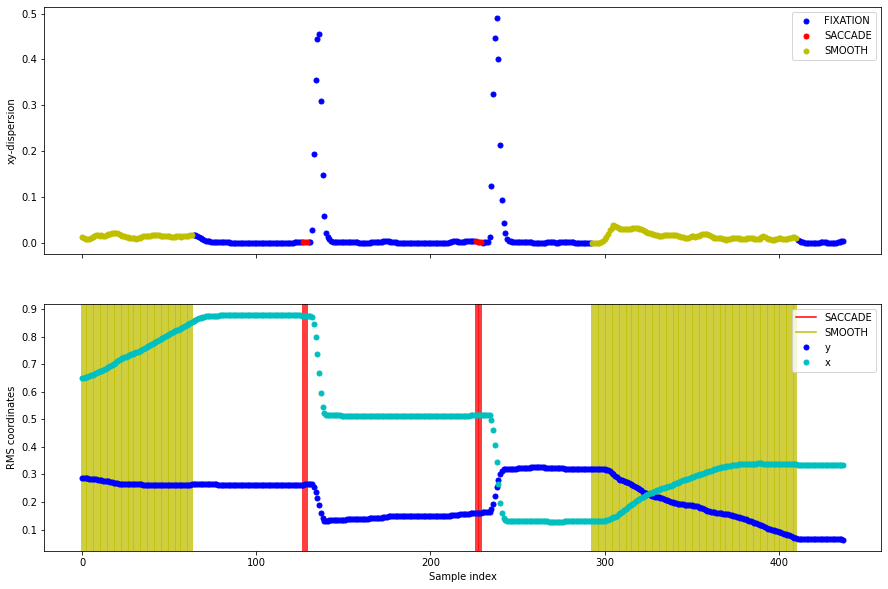

In [9]:
def generateDatasetPlotAxes(df, ax1, ax2, legend=True):
    df["sampleIndex"] = [i for i in range(len(df["sampleIndex"]))]
    groups = df.groupby("Label")
    colorMap = {"FIXATION": 'b', "SACCADE": 'r', "BLINK": 'g', "SMOOTH": 'y'}
    for name, group in groups:
        ax1.plot(group["sampleIndex"], group.disp, 
            marker='o', linestyle='', markersize=5, label=name, c=colorMap[name])
        if name == "SACCADE":
            it = 0
            for x in group["sampleIndex"]:
                if it == 0:
                    it = 1
                    ax2.axvline(x=x, c='r', label="SACCADE")
                else: ax2.axvline(x=x, c='r')
        if name == "BLINK":
            it = 0
            for x in group["sampleIndex"]:
                if it == 0:
                    it = 1
                    ax2.axvline(x=x, c='g', label="BLINK")
                else: ax2.axvline(x=x, c='g')
        if name == "SMOOTH":
            it = 0
            for x in group["sampleIndex"]:
                if it == 0:
                    it = 1
                    ax2.axvline(x=x, c='y', label="SMOOTH")
                else: ax2.axvline(x=x, c='y')

    ax2.plot(df["sampleIndex"], df.y_rms, 
        marker='o', linestyle='', markersize=5, label="y", c='b')
    ax2.plot(df["sampleIndex"], df.x_rms, 
        marker='o', linestyle='', markersize=5, label="x", c='c')
    ax2.set_xlabel('Sample index')
    ax1.set_ylabel('xy-dispersion')
    ax2.set_ylabel('RMS coordinates')
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper right')
    return ax1, ax2

def plotDataset(df):
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex='col')
    fig.set_figheight(10)
    fig.set_figwidth(15)
    ax1, ax2 = generateDatasetPlotAxes(df, ax1, ax2)

def plotDualDatasets(df1, df2):
    fig, axes = plt.subplots(2, 2, sharex='col', sharey='row')
    fig.set_figheight(10)
    fig.set_figwidth(15)
    axes[0, 0], axes[1, 0] = generateDatasetPlotAxes(df1, axes[0, 0], axes[1, 0], False)
    axes[0, 1], axes[1, 1] = generateDatasetPlotAxes(df2, axes[0, 1], axes[1, 1])

%matplotlib inline

# plotDataset(DynData[120:720])
# plotDualDatasets(StaticPreData[:250], DynPreData[140:390])
# plotDataset(StaticData[:400])
plotDataset(TestData)